In [3]:
import cv2
from ultralytics import YOLO

In [4]:
model = YOLO("yolov10x.pt")

In [5]:
def predict(chosen_model, img, classes=[], conf=0.5):
    if classes:
        results = chosen_model.predict(img, classes=classes, conf=conf)
    else:
        results = chosen_model.predict(img, conf=conf)

    return results

def predict_and_detect(chosen_model, img, classes=[], conf=0.5, rectangle_thickness=2, text_thickness=1):
    results = predict(chosen_model, img, classes, conf=conf)
    for result in results:
        for box in result.boxes:
            cv2.rectangle(img, (int(box.xyxy[0][0]), int(box.xyxy[0][1])),
                          (int(box.xyxy[0][2]), int(box.xyxy[0][3])), (255, 0, 0), rectangle_thickness)
            cv2.putText(img, f"{result.names[int(box.cls[0])]}",
                        (int(box.xyxy[0][0]), int(box.xyxy[0][1]) - 10),
                        cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), text_thickness)
    return img, results

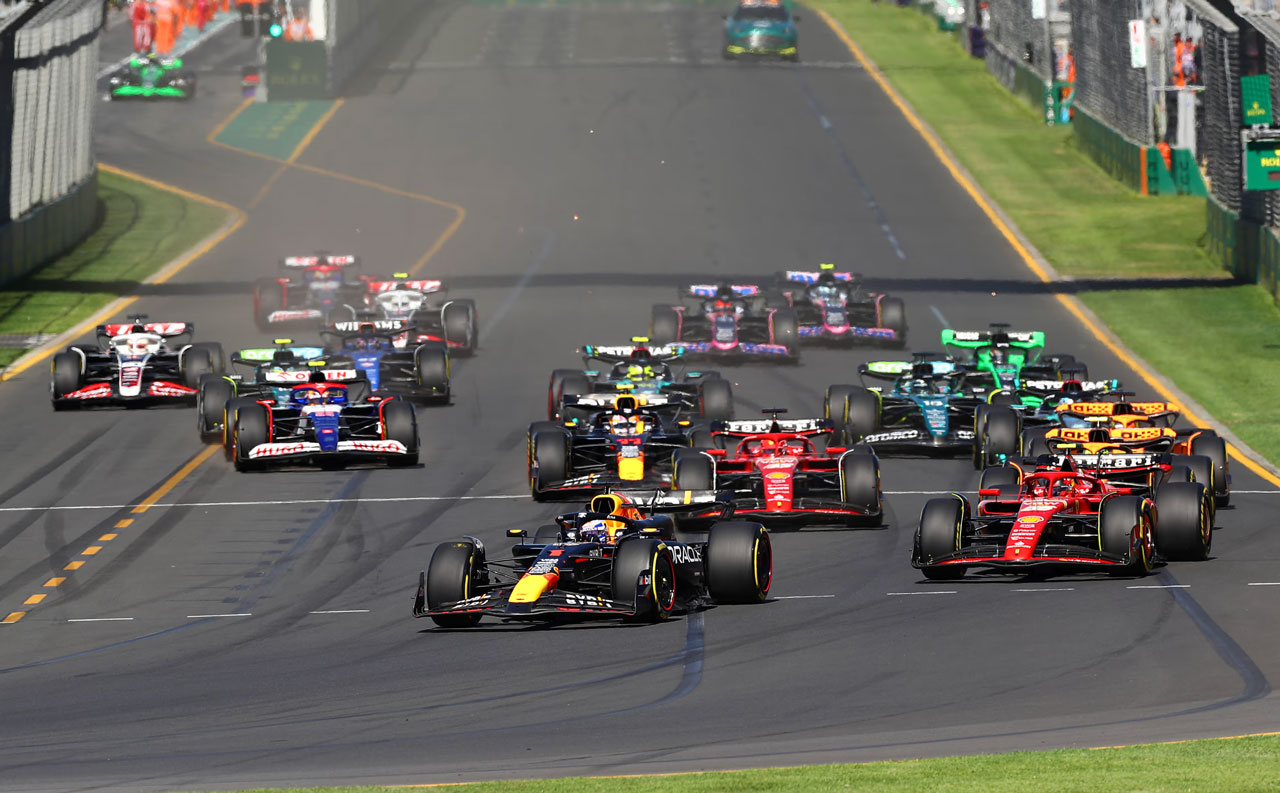

In [6]:
# read the image
from IPython.display import Image, display
filename = "image.jpg"
image = cv2.imread(filename)
display(Image(filename=filename))

In [7]:
result_img, _ = predict_and_detect(model, image, classes=[], conf=0.02)


0: 416x640 2 persons, 4 cars, 5 motorcycles, 11 trucks, 458.1ms
Speed: 5.3ms preprocess, 458.1ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 640)


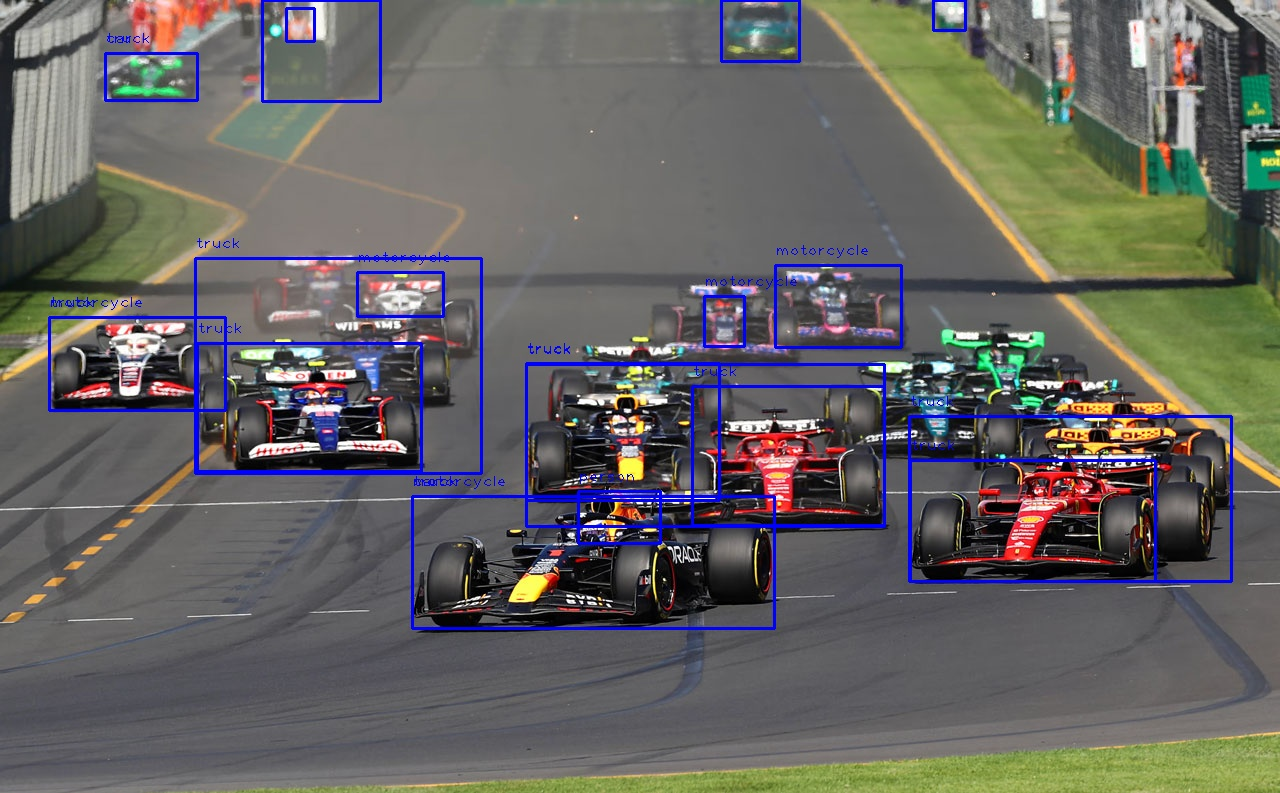

In [8]:
cv2.imwrite('image_output.jpg',result_img)
display(Image(filename='image_output.jpg'))